# Analisis Sport Car Price

https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset

**Columns**

 - <ins>Car Make</ins>: The make of the sports car, which represents the brand 
or company that produced the car. Examples of car makes in this dataset 
include Porsche, Lamborghini, Ferrari, Audi, and McLaren.

 - <ins>Car Model</ins>: The model of the sports car, 
which represents the specific version or variant of the car produced
by the manufacturer. Examples of car models in this dataset 
include 911, Huracan, 488 GTB, R8, 720S, M8, AMG GT, Corvette, 
Mustang Shelby GT500, and GT-R Nismo.
 - <ins>Year</ins>: The year of production of the sports car, 
which indicates the model year when the car was first introduced 
or made available for purchase.
 - <ins>Engine Size (L)</ins>: The size of the sports car's engine in liters, 
which represents the volume of the engine's cylinders. 
A larger engine size typically indicates higher power and performance. 
Engine sizes in this dataset range from 2.0L to 8.0L, with some cars 
having electric motors instead.

 - <ins>Horsepower</ins>: The horsepower of the sports car, which represents 
the power output of the car's engine. Higher horsepower typically indicates 
faster acceleration and higher top speed. 
Horsepower values in this dataset range from 181 to 1479.

 - <ins>Torque (lb-ft)</ins>: The torque of the sports car in pound-feet, 
which represents the rotational force generated by the engine. 
Higher torque values typically indicate stronger acceleration and better handling. 
Torque values in this dataset range from 270 to 1180.

 - <ins>0-60 MPH Time (seconds)</ins>: The time it takes for the sports car to accelerate 
from 0 to 60 miles per hour, which is a common measure of acceleration and performance. 
Lower 0-60 MPH times typically indicate faster acceleration and better performance. 
0-60 MPH times in this dataset range from 1.85 to 6.5 seconds.

 - <ins>Price (in USD)</ins>: The price of the sports car in US dollars, 
which represents the cost of purchasing the car. Prices in this dataset 
range from  25,000 to 3,000,000.

# DATA MINING

#### <ins>Eliminamos posibles avisos de warnings</ins>

In [1]:
import warnings 
warnings.filterwarnings('ignore')

#### <ins>Instalo librerias standars</ins>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### <ins>Cargamos el modelo, analizamos los datos & columnas/variables</ins>

In [3]:
df = pd.read_csv("./Sport car price.csv", sep=",")
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [4]:
df.tail()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"
1006,Rimac,Nevera,2021,Electric Motor,1888,1696,1.85,"2,400,000"


**Observamos que tenemos un total de <ins>1007</ins> datos**

In [5]:
df.describe(include='all')

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,1007,1007,1007.000000,997,1007,1004,1007,1007
unique,38,176,NaN,45,124,93,43,367
top,Porsche,GT,NaN,4,503,590,3.5,"500,000"
freq,88,55,NaN,219,45,71,153,34
mean,NaN,NaN,2021.201589,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.019802,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1965.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN


**Nota:**
    
    - Con el describe vemos que todas las variables/campos.
    
    - Observamos que tanto el campo "Engine Size" como el campo "Torque" le faltan datos.

    - Queremos predecir la variable "price"

In [6]:
df.rename(columns={'Car Make':'Car_Make','Car Model':'Car_Model','Engine Size (L)':'Engine_Size','Torque (lb-ft)':'Torque','0-60 MPH Time (seconds)':'Time0to60','Price (in USD)':'Price'}, inplace=True)
df.head(25)

,Car_Make,Car_Model,Year,Engine_Size,Horsepower,Torque,Time0to60,Price
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
5,BMW,M8,2022,4.4,617,553,3.1,"130,000"
6,Mercedes-Benz,AMG GT,2021,4,523,494,3.8,"118,500"
7,Chevrolet,Corvette,2021,6.2,490,465,2.8,"59,900"
8,Ford,Mustang Shelby GT500,2022,5.2,760,625,3.5,"81,000"
9,Nissan,GT-R Nismo,2021,3.8,600,481,2.5,"212,000"


In [7]:
df.isnull().sum()

Car_Make        0
Car_Model       0
Year            0
Engine_Size    10
Horsepower      0
Torque          3
Time0to60       0
Price           0
dtype: int64

**Primeras conclusiones:**
    
    - Tenemos que Engine_Size & Torque le faltan 10 y 3 datos respectivamente.
    
**Vamos a excluir estas columnas**

# Feature Engineering

#### <ins>Eliminamos Engine_Size & Torque</ins>

In [8]:
dfNew= df.drop(["Engine_Size"], axis = 1)
dfNew

,Car_Make,Car_Model,Year,Horsepower,Torque,Time0to60,Price
0,Porsche,911,2022,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,661,561,3,"333,750"
3,Audi,R8,2022,562,406,3.2,"142,700"
4,McLaren,720S,2021,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,764,738,3,"2,600,000"


In [9]:
dfNew= dfNew.drop(["Torque"], axis = 1)
dfNew

,Car_Make,Car_Model,Year,Horsepower,Time0to60,Price
0,Porsche,911,2022,379,4,"101,200"
1,Lamborghini,Huracan,2021,630,2.8,"274,390"
2,Ferrari,488 GTB,2022,661,3,"333,750"
3,Audi,R8,2022,562,3.2,"142,700"
4,McLaren,720S,2021,710,2.7,"298,000"
...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,1280,2.5,"3,000,000"
1003,Lotus,Evija,2021,1972,2,"2,000,000"
1004,McLaren,Senna,2021,789,2.7,"1,000,000"
1005,Pagani,Huayra,2021,764,3,"2,600,000"


#### <ins>Cogemos intervalos para las variables Time0to60 & Horsepower</ins>

In [10]:
for i in range(len(df)):
    if dfNew.Time0to60[i] <= '0':
        dfNew.Time0to60[i] = '0'
    elif dfNew.Time0to60[i]<= '2':
        dfNew.Time0to60[i] = 'up0to2'
    elif dfNew.Time0to60[i]<= '2.5':
        dfNew.Time0to60[i] = 'up2to2,5'
    elif dfNew.Time0to60[i]<= '3':
        dfNew.Time0to60[i] = 'up2,5to3'
    elif dfNew.Time0to60[i]<= '3.5':
        dfNew.Time0to60[i] = 'up3to3,5'
    elif dfNew.Time0to60[i]<= '3.8':
        dfNew.Time0to60[i] = 'up3,5to3,8'
    elif dfNew.Time0to60[i]<= '4':
        dfNew.Time0to60[i] = 'up3,8to4'
    else:
        dfNew.Time0to60[i] = 'up4'
        
print(dfNew)

         Car_Make Car_Model  Year Horsepower Time0to60      Price
0         Porsche       911  2022        379  up3,8to4    101,200
1     Lamborghini   Huracan  2021        630  up2,5to3    274,390
2         Ferrari   488 GTB  2022        661  up2,5to3    333,750
3            Audi        R8  2022        562  up3to3,5    142,700
4         McLaren      720S  2021        710  up2,5to3    298,000
...           ...       ...   ...        ...       ...        ...
1002   Koenigsegg     Jesko  2022       1280  up2to2,5  3,000,000
1003        Lotus     Evija  2021       1972    up0to2  2,000,000
1004      McLaren     Senna  2021        789  up2,5to3  1,000,000
1005       Pagani    Huayra  2021        764  up2,5to3  2,600,000
1006        Rimac    Nevera  2021       1888    up0to2  2,400,000

[1007 rows x 6 columns]


In [11]:
dfNew['Time0to60'].value_counts()

up3to3,5      282
up4           222
up2,5to3      192
up3,5to3,8    142
up2to2,5       71
up3,8to4       63
up0to2         35
Name: Time0to60, dtype: int64

In [12]:
dfNew.Time0to60 = dfNew.Time0to60.map({'up0to2': 0, 'up2to2,5': 1, 'up2,5to3': 2, 'up3to3,5': 3,
                                   'up3,5to3,8': 4, 'up3,8to4': 5, 'up4': 6 })
dfNew.Time0to60

0       5
1       2
2       2
3       3
4       2
       ..
1002    1
1003    0
1004    2
1005    2
1006    0
Name: Time0to60, Length: 1007, dtype: int64

<AxesSubplot: >

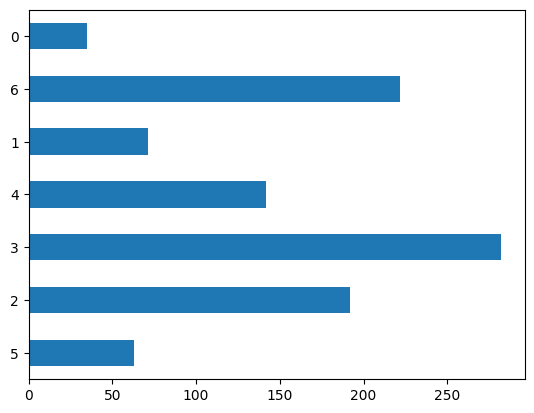

In [13]:
dfNew.Time0to60.value_counts()[dfNew.Time0to60.unique()].plot(kind = 'barh')

In [14]:
for i in range(len(df)):
    if dfNew.Horsepower[i] <= '0':
        dfNew.Horsepower[i] = '0'
    elif dfNew.Horsepower[i]<= '200':
        dfNew.Horsepower[i] = 'up0to200'
    elif dfNew.Horsepower[i]<= '400':
        dfNew.Horsepower[i] = 'up200to400'
    elif dfNew.Horsepower[i]<= '500':
        dfNew.Horsepower[i] = 'up400to500'
    elif dfNew.Horsepower[i]<= '600':
        dfNew.Horsepower[i] = 'up500to600'
    elif dfNew.Horsepower[i]<= '700':
        dfNew.Horsepower[i] = 'up600to700'
    elif dfNew.Horsepower[i]<= '750':
        dfNew.Horsepower[i] = 'up700to750'
    else:
        dfNew.Horsepower[i] = 'up750'
        
print(dfNew)

         Car_Make Car_Model  Year  Horsepower  Time0to60      Price
0         Porsche       911  2022  up200to400          5    101,200
1     Lamborghini   Huracan  2021  up600to700          2    274,390
2         Ferrari   488 GTB  2022  up600to700          2    333,750
3            Audi        R8  2022  up500to600          3    142,700
4         McLaren      720S  2021  up700to750          2    298,000
...           ...       ...   ...         ...        ...        ...
1002   Koenigsegg     Jesko  2022    up0to200          1  3,000,000
1003        Lotus     Evija  2021    up0to200          0  2,000,000
1004      McLaren     Senna  2021       up750          2  1,000,000
1005       Pagani    Huayra  2021       up750          2  2,600,000
1006        Rimac    Nevera  2021    up0to200          0  2,400,000

[1007 rows x 6 columns]


In [15]:
dfNew['Horsepower'].value_counts()

up400to500    214
up600to700    212
up500to600    193
up200to400    135
up700to750     95
up0to200       81
up750          77
Name: Horsepower, dtype: int64

In [16]:
dfNew.Horsepower = dfNew.Horsepower.map({'up0to200': 0, 'up200to400': 1, 'up400to500': 2, 'up500to600': 3,
                                   'up600to700': 4, 'up700to750': 5, 'up750': 6 })
dfNew.Horsepower

0       1
1       4
2       4
3       3
4       5
       ..
1002    0
1003    0
1004    6
1005    6
1006    0
Name: Horsepower, Length: 1007, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Car_Make     1007 non-null   object
 1   Car_Model    1007 non-null   object
 2   Year         1007 non-null   int64 
 3   Engine_Size  997 non-null    object
 4   Horsepower   1007 non-null   object
 5   Torque       1004 non-null   object
 6   Time0to60    1007 non-null   object
 7   Price        1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [18]:
dfNew

,Car_Make,Car_Model,Year,Horsepower,Time0to60,Price
0,Porsche,911,2022,1,5,"101,200"
1,Lamborghini,Huracan,2021,4,2,"274,390"
2,Ferrari,488 GTB,2022,4,2,"333,750"
3,Audi,R8,2022,3,3,"142,700"
4,McLaren,720S,2021,5,2,"298,000"
...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,0,1,"3,000,000"
1003,Lotus,Evija,2021,0,0,"2,000,000"
1004,McLaren,Senna,2021,6,2,"1,000,000"
1005,Pagani,Huayra,2021,6,2,"2,600,000"


In [19]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Car_Make    1007 non-null   object
 1   Car_Model   1007 non-null   object
 2   Year        1007 non-null   int64 
 3   Horsepower  1007 non-null   int64 
 4   Time0to60   1007 non-null   int64 
 5   Price       1007 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.3+ KB


**Vemos que el precio no consta como numerico**
**ya que la bbdd viene en formato americano y tenemos que hacer modificaciones**

In [20]:
dfNew['Price'] = dfNew['Price'].str.replace(",", "")
dfNew['Price']

0        101200
1        274390
2        333750
3        142700
4        298000
         ...   
1002    3000000
1003    2000000
1004    1000000
1005    2600000
1006    2400000
Name: Price, Length: 1007, dtype: object

In [21]:
dfNew['Price'] = dfNew['Price'].astype(str).astype(int)

In [22]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Car_Make    1007 non-null   object
 1   Car_Model   1007 non-null   object
 2   Year        1007 non-null   int64 
 3   Horsepower  1007 non-null   int64 
 4   Time0to60   1007 non-null   int64 
 5   Price       1007 non-null   int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 43.4+ KB


In [23]:
dfNew.describe(include='all')

,Car_Make,Car_Model,Year,Horsepower,Time0to60,Price
count,1007,1007,1007.000000,1007.000000,1007.000000,1.007000e+03
unique,38,176,NaN,NaN,NaN,NaN
top,Porsche,GT,NaN,NaN,NaN,NaN
freq,88,55,NaN,NaN,NaN,NaN
mean,NaN,NaN,2021.201589,2.906653,3.491559,3.820359e+05
std,NaN,NaN,2.019802,1.656131,1.709428,7.383227e+05
min,NaN,NaN,1965.000000,0.000000,0.000000,2.500000e+04
25%,NaN,NaN,2021.000000,2.000000,2.000000,7.180000e+04
50%,NaN,NaN,2021.000000,3.000000,3.000000,1.400000e+05
75%,NaN,NaN,2022.000000,4.000000,5.000000,2.500000e+05


**Convertir el Price en int32 ya me cubre el rango de Price ya que**
**max= 5200000 y min= 25000**
**Int32 -- (-2,147,483,648 to +2,147,483,647)**

In [24]:
dfNewdumies=pd.get_dummies(dfNew)
dfNewdumies

,Year,Horsepower,Time0to60,Price,Car_Make_Acura,Car_Make_Alfa Romeo,Car_Make_Alpine,Car_Make_Ariel,Car_Make_Aston Martin,Car_Make_Audi,...,Car_Model_Taycan Turbo S,Car_Model_Urus,Car_Model_Vantage,Car_Model_Viper,Car_Model_Viper ACR,Car_Model_WRX STI,Car_Model_Wraith,Car_Model_Z4 M40i,Car_Model_Z4 Roadster,Car_Model_i8
0,2022,1,5,101200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,4,2,274390,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,4,2,333750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,3,3,142700,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2021,5,2,298000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2022,0,1,3000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,2021,0,0,2000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,2021,6,2,1000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,2021,6,2,2600000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### <ins>Hacemos el mapa de calor para ver la correlación entre variables</ins>

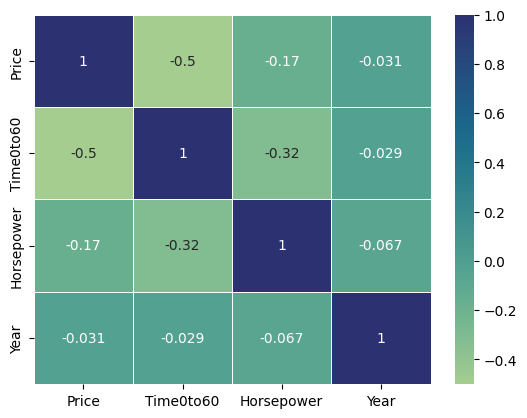

In [25]:
rw = dfNew[['Price','Time0to60','Horsepower','Year']]
sns.heatmap(rw.corr(method='pearson'),annot = True,cmap="crest", linewidth=.5)
plt.show()

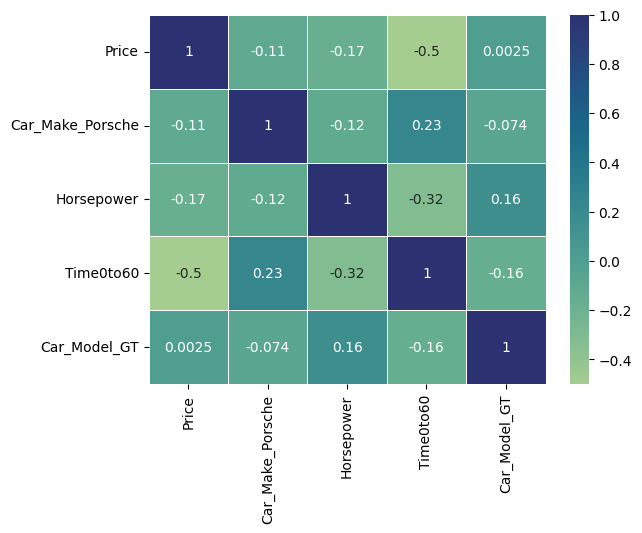

In [26]:
rw = dfNewdumies[['Price','Car_Make_Porsche','Horsepower','Time0to60','Car_Model_GT']]
sns.heatmap(rw.corr(method='pearson'),annot = True,cmap="crest", linewidth=.5)
plt.show()

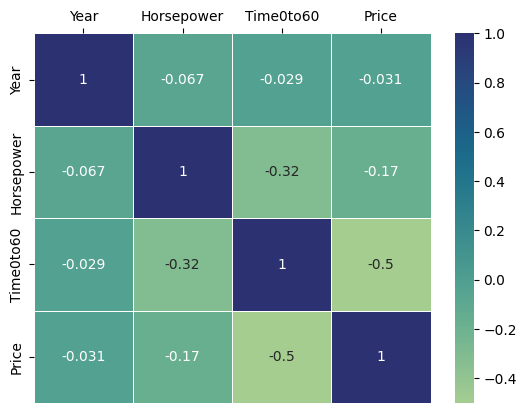

In [27]:
hm= sns.heatmap(dfNew.corr(method='pearson'),annot = True,cmap="crest", linewidth=.5)
hm.xaxis.tick_top()
plt.show()

**Primeras conclusiones:**
    
    - En los mapas de calor vemos que no hay correlación entre variables.
    
Es logico, ya que puede haber correlación de las variables 
pero por modelo o por marca, si las miramos a nivel global no se relacionan
    

#### <ins> Analizamos los datos a partir de diferentes tipos de gráficos</ins>

#### Veamos como se comporta la variable precio

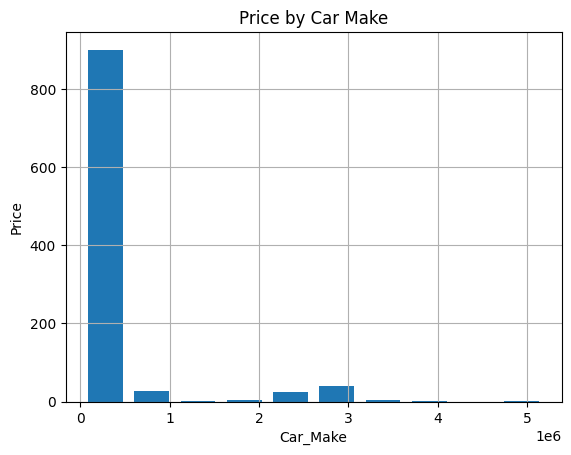

In [28]:
# plotting a histogram 
plt.hist(dfNew.Price, bins=10, 
         histtype = 'bar',
         rwidth = 0.75)

plt.grid(True)
plt.xlabel('Car_Make') 
plt.ylabel('Price') 
plt.title('Price by Car Make') 

plt.show()

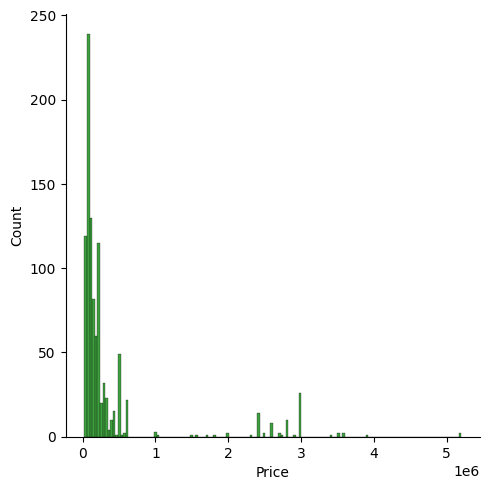

In [29]:
# con este gráfico mejoramos la visualización 
# de la distribución con intervalos mas pequeños
sns.displot(dfNew.Price, color="Green")

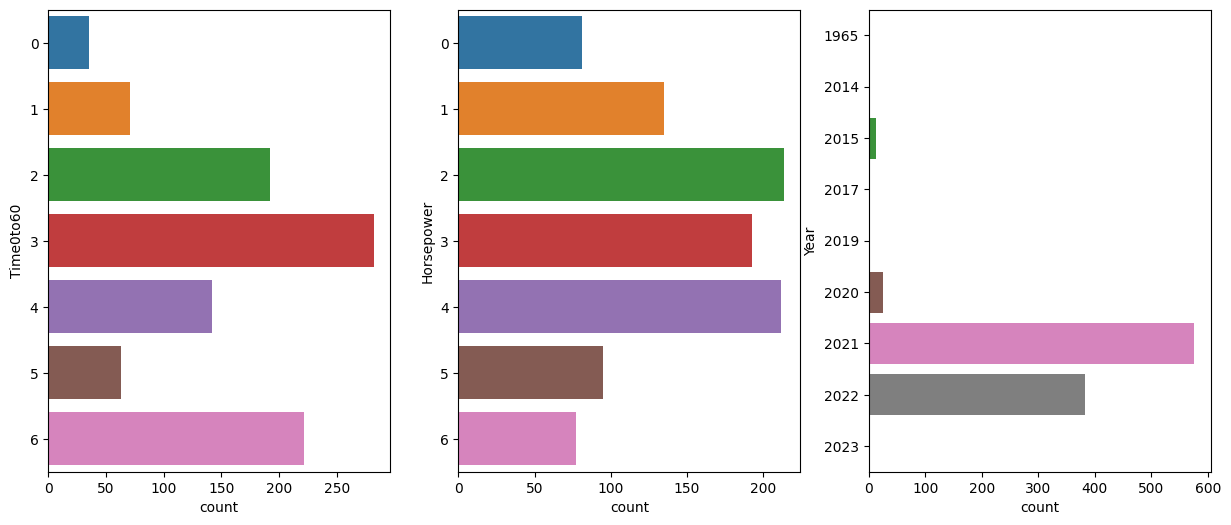

In [30]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.countplot(y=dfNewdumies.Time0to60)

plt.subplot(1,3,2) 
sns.countplot(y=dfNewdumies.Horsepower)

plt.subplot(1,3,3) 
sns.countplot(y=dfNewdumies.Year)

plt.show()

<AxesSubplot: xlabel='Horsepower', ylabel='Price'>

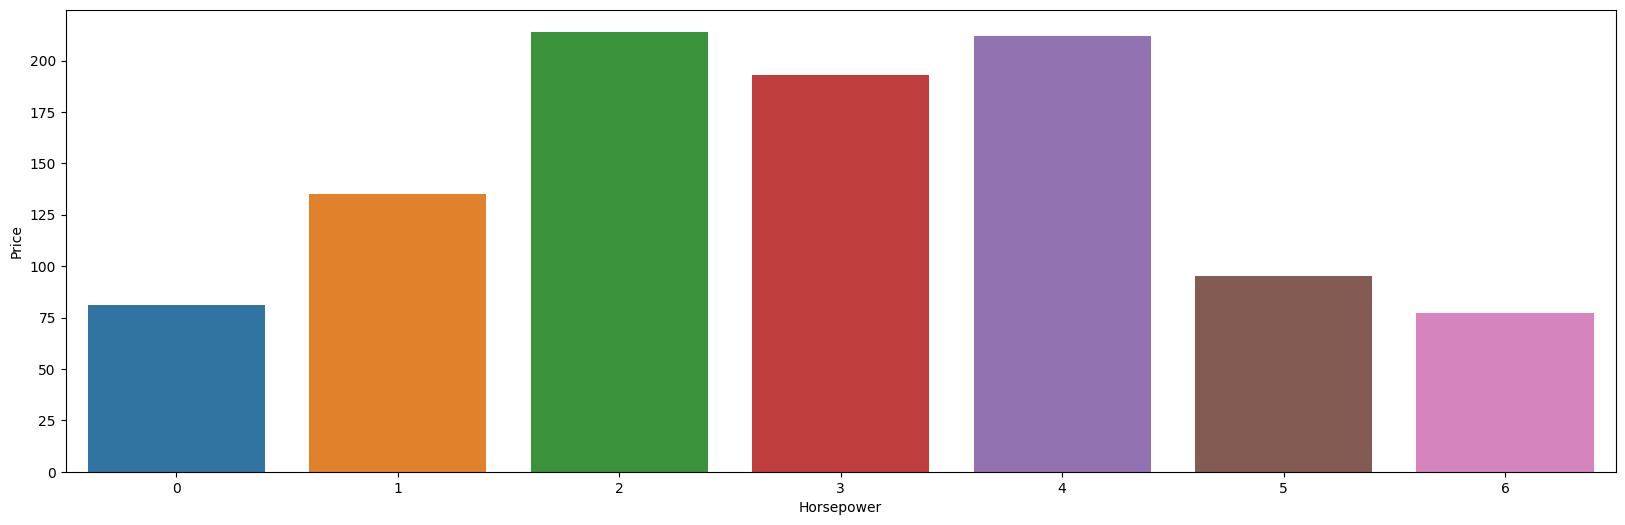

In [31]:
plt.figure(figsize=(20,6))
HorsepowerPLOT = dfNewdumies['Horsepower'].value_counts().head(10).reset_index()
HorsepowerPLOT.columns = ['Horsepower','Price']
sns.barplot(data=HorsepowerPLOT,x='Horsepower',y='Price')

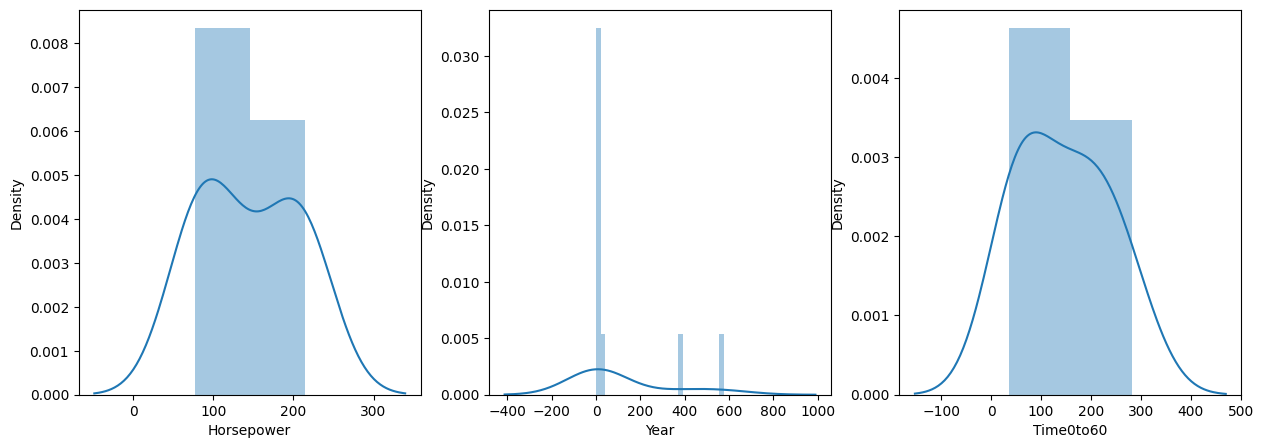

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(dfNewdumies['Horsepower'].value_counts())

plt.subplot(1,3,2)
sns.distplot(dfNewdumies['Year'].value_counts())

plt.subplot(1,3,3)
sns.distplot(dfNewdumies['Time0to60'].value_counts())
plt.show()

Text(0.5, 1.0, 'Car Price for Time0to60')

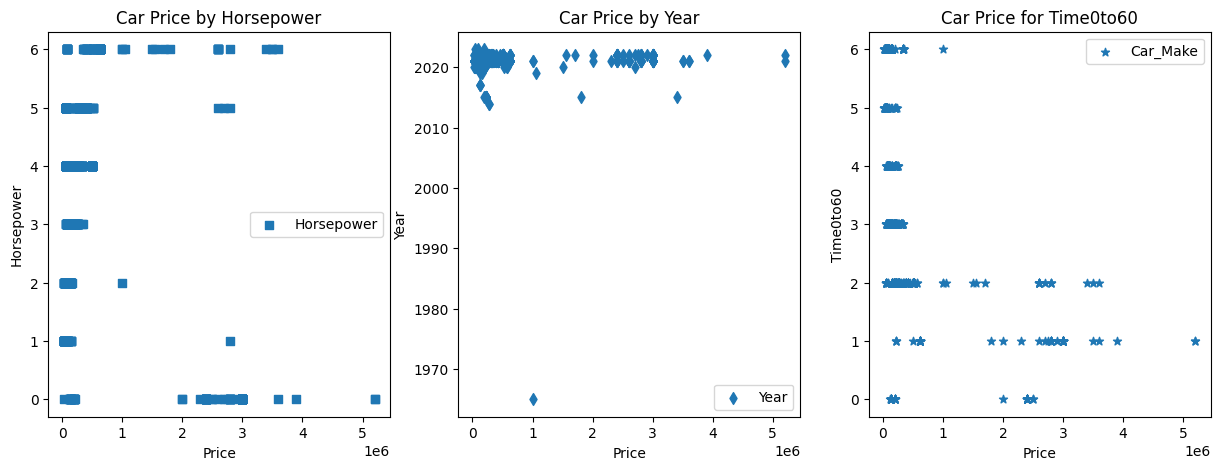

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(dfNew.Price, dfNewdumies.Horsepower, 
            label= "Horsepower",
            marker= "s") 
plt.xlabel('Price')  
plt.ylabel('Horsepower') 
plt.legend() 
plt.title('Car Price by Horsepower') 

plt.subplot(1,3,2)
plt.scatter(dfNew.Price, dfNewdumies.Year, 
            label= "Year",
            marker= "d") 
plt.xlabel('Price')  
plt.ylabel('Year') 
plt.legend() 
plt.title('Car Price by Year') 

plt.subplot(1,3,3)
plt.scatter(dfNew.Price, dfNewdumies.Time0to60, 
            label= "Car_Make",
            marker= "*") 
plt.xlabel('Price')  
plt.ylabel('Time0to60') 
plt.legend() 
plt.title('Car Price for Time0to60') 

<AxesSubplot: xlabel='Car_Make', ylabel='count'>

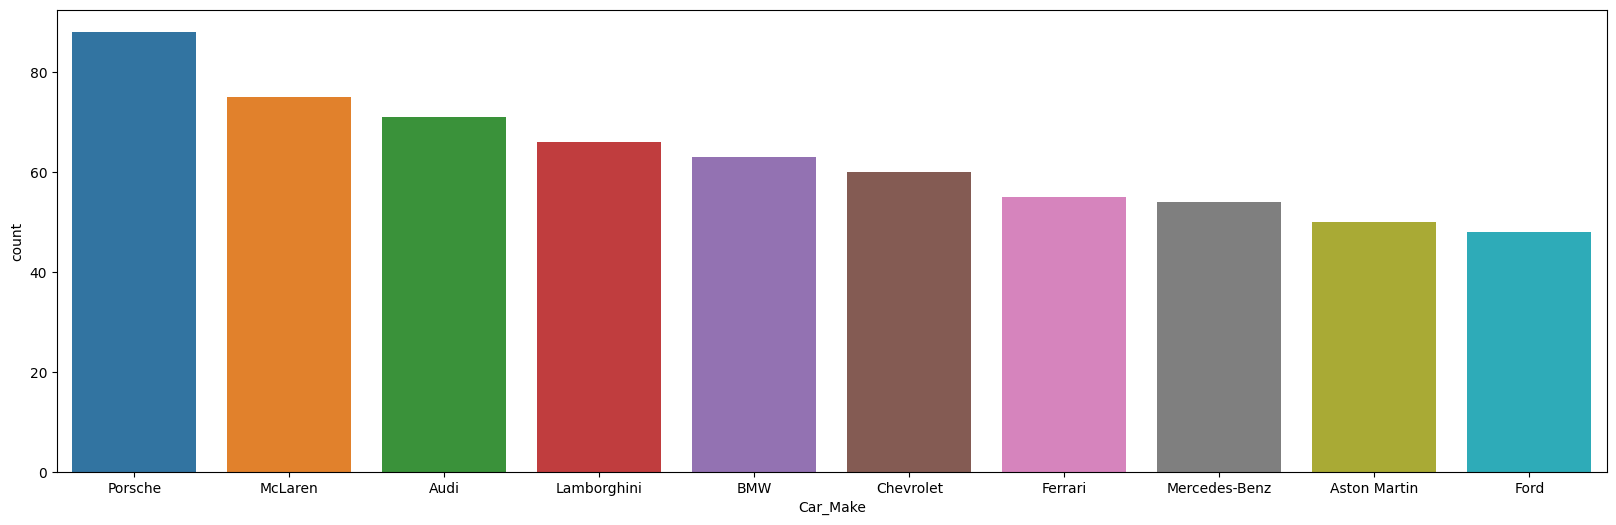

In [34]:
# Queremos analizar las marcas de coche
# para ello usamos el dfNew en lugar del dfNewdumies
plt.figure(figsize=(20,6))
car_makePLOT = dfNew['Car_Make'].value_counts().head(10).reset_index()
car_makePLOT.columns = ['Car_Make','count']
sns.barplot(data=car_makePLOT,x='Car_Make',y='count')

<AxesSubplot: xlabel='Car_Model', ylabel='count'>

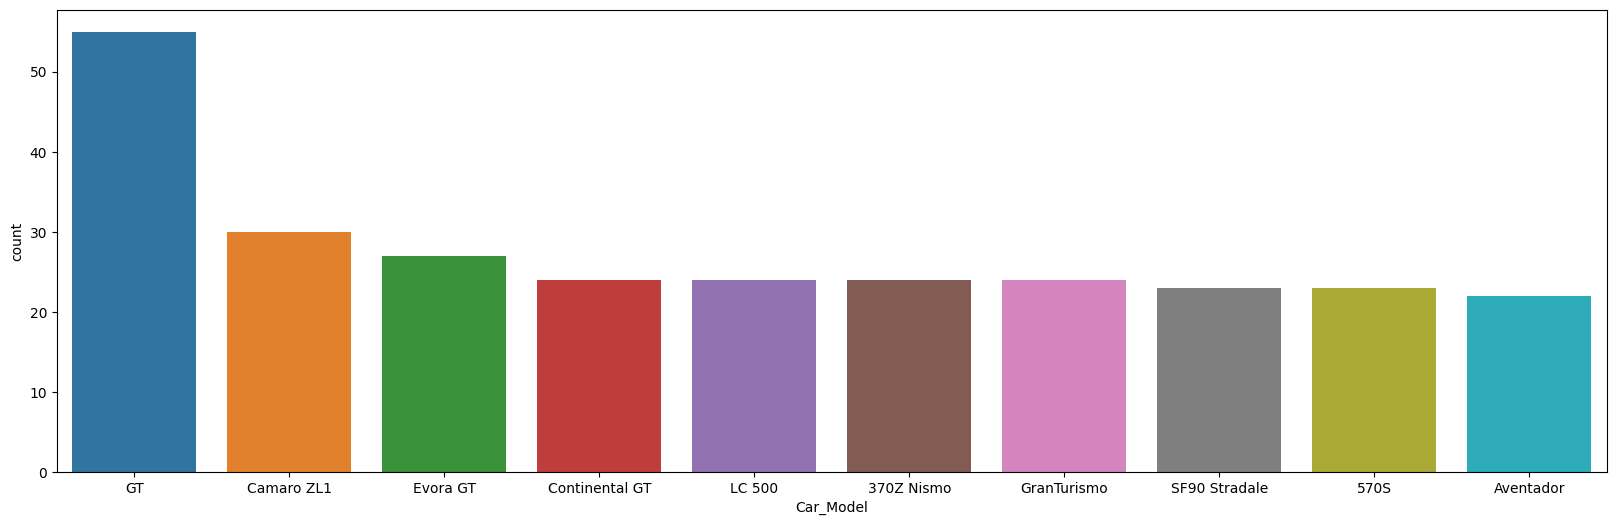

In [35]:
# Queremos analizar las modelos de coche
# para ello usamos el dfNew en lugar del dfNewdumies
plt.figure(figsize=(20,6))
car_makePLOT = dfNew['Car_Model'].value_counts().head(10).reset_index()
car_makePLOT.columns = ['Car_Model','count']
sns.barplot(data=car_makePLOT,x='Car_Model',y='count')   

Text(0.5, 1.0, 'Car Price for Car_Make')

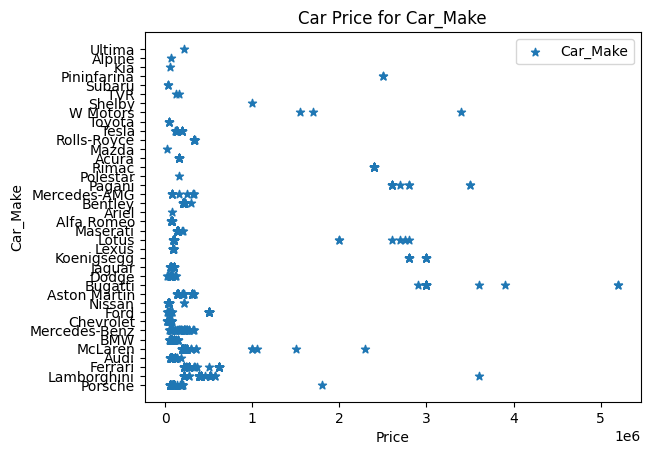

In [36]:
plt.scatter(dfNew.Price, dfNew.Car_Make, 
            label= "Car_Make",
            marker= "*") 
plt.xlabel('Price')  
plt.ylabel('Car_Make') 
plt.legend() 
plt.title('Car Price for Car_Make') 

**Como conclusión, tenemos que **

# Entrenamiento de datos

#### <ins> Importamos todas las librerias para la regresión</ins>

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [38]:
dfNewdumies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Columns: 218 entries, Year to Car_Model_i8
dtypes: int32(1), int64(3), uint8(214)
memory usage: 238.1 KB


#### <ins> Establecemos X & y </ins>

In [39]:
X= dfNewdumies.drop(["Price"], axis = 1)
X

,Year,Horsepower,Time0to60,Car_Make_Acura,Car_Make_Alfa Romeo,Car_Make_Alpine,Car_Make_Ariel,Car_Make_Aston Martin,Car_Make_Audi,Car_Make_BMW,...,Car_Model_Taycan Turbo S,Car_Model_Urus,Car_Model_Vantage,Car_Model_Viper,Car_Model_Viper ACR,Car_Model_WRX STI,Car_Model_Wraith,Car_Model_Z4 M40i,Car_Model_Z4 Roadster,Car_Model_i8
0,2022,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,3,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2022,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,2021,6,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,2021,6,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y=dfNewdumies["Price"]
y

0        101200
1        274390
2        333750
3        142700
4        298000
         ...   
1002    3000000
1003    2000000
1004    1000000
1005    2600000
1006    2400000
Name: Price, Length: 1007, dtype: int32

#### <ins> Dividimos nuestros datos en set de entrenamiento y set de datos</ins>

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
y_test

799     147000
311      63000
85     3000000
435    3000000
204      87200
        ...   
814      42000
231     203825
5       130000
452      62000
683    3000000
Name: Price, Length: 202, dtype: int32

# Exactitud del modelo

#### <ins> Buscamos el mejor modelo: </ins>

#### 1. KNeighborsRegressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
algoritmo = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p=2)
algoritmo.fit(X_train, y_train)
y_predknn = algoritmo.predict(X_test)

In [45]:
score_knn = r2_score(y_test, y_predknn)

#### 2. Bayesian Ridge Regression

In [46]:
from sklearn import linear_model

In [47]:
regBRR = linear_model.BayesianRidge()
regBRR.fit(X_train, y_train)
y_predBRR = regBRR.predict(X_test)

In [48]:
score_BRR = r2_score(y_test, y_predBRR)

#### 3. RandomForestRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)

In [50]:
score_rfc = r2_score(y_test, y_predrfr)

In [51]:
Adjusted_R2_rfc=(1 - (1-metrics.r2_score(y_test, y_predrfr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

#### 4. LinearRegression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
y_predLR = regressor.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
scoreLR=r2_score(y_test,y_predLR)

In [55]:
Adjusted_R2=(1 - (1-metrics.r2_score(y_test, y_predLR))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

###### 5. XGBRegressor

In [56]:
from xgboost import XGBRegressor
XGBR = XGBRegressor()
XGBR.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
y_predXGBR = regressor.predict(X_test)

In [58]:
scoreXGBR=r2_score(y_test,y_predXGBR)

#### <ins> Resumen de datos </ins>

In [59]:
print("Los valore para cada modelo son:\n")
print("KNeighborsRegressor: ",score_knn)
print("Bayesian Ridge Regression: ",score_BRR)
print("RandomForestRegressor: ",score_rfc)
print("LinearRegression",scoreLR)
print("XGBRegressor",scoreXGBR)

Los valore para cada modelo son:

KNeighborsRegressor:  0.951793716475524
Bayesian Ridge Regression:  0.9555670716374056
RandomForestRegressor:  0.9699851933133095
LinearRegression -6.815660216702636e+18
XGBRegressor -6.815660216702636e+18


**Tenemos que el modelo que mas ajusta el el RandomForestRegressor**

In [60]:
# Creamos una función que nos da el mejor de los modelos

def test_model():
    models = {}
    models['KNeighborsRegressor'] = score_knn
    models['Bayesian Ridge Regression'] = score_BRR
    models['RandomForestRegressor'] = score_rfc
    models['LinearRegression'] = scoreLR
    models['XGBRegressor'] = scoreXGBR
   
    for key, value in models.items():
        if max(models.values()) == value:
            return key, value
        
test_model()

('RandomForestRegressor', 0.9699851933133095)

**Conclusión: Usaremos el RandomForestRegressor**

#### <ins> Importación del modelo </ins>

**Cogemos el RandomForestRegressor**

In [61]:
import pickle
pickle.dump(rfr, open('model.pkl','wb'))

#### <ins> Valoración de un coche concreto </ins>

In [62]:
"""
Si tenemos un coche con las siguientes mediciones ¿qué precio tendría?
valor=[datos a medir]
test = rfr.predict(valor)
test
Este paso lo haremos en la applicación streamlit ya que nos lo calculará mediante el pickle
"""

'\nSi tenemos un coche con las siguientes mediciones ¿qué precio tendría?\nvalor=[datos a medir]\ntest = rfr.predict(valor)\ntest\nEste paso lo haremos en la applicación streamlit ya que nos lo calculará mediante el pickle\n'